# Learning Jupyter Notebook

1 Hashtag # is for marking header above

2 Some basic python commands below

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.DataFrame(data=np.array([[1,2,3],[4,5,6]], dtype=int), columns=["A","B","C"])

In [9]:
print(df)

   A  B  C
0  1  2  3
1  4  5  6


3 This is start trial of Jupyter for latex $e=mc^2$, we can either use ipython.display or direct surround the latex formula by $

In [10]:
from IPython.display import display, Math, Latex
display(Math(r'\sqrt{a^2+b^2}'))

<IPython.core.display.Math object>

$\sqrt{a^2+b^2}$

Add addional python kernal to jupyter below

conda create -n py27 python=2.7 ipykernel

activate ipykernel

python -m ipykernel install --user

4 Magic commands

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

In [2]:
?%alias_magic

In [3]:
%time x = range(100)

Wall time: 0 ns


In [4]:
%%timeit x = range(100)
max(x)

2.12 µs ± 42 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
?%%timeit

%%timeit is run in cell mode, x=range(100) is just a setup code and won't get counted. max(x) is the real part for timeing

we can also install package and load with magic commands per below

!pip install ipython-sql

%load_ext sql

5 Setup password

In [3]:
from IPython.lib import passwd
password = passwd("2dising$32")
password

'sha1:59d4bf96ba19:f28988db388b92cbae2068d246674ca2a77c8891'

In [6]:
!jupyter notebook --generate-config

Writing default config to: C:\Users\gonglch\.jupyter\jupyter_notebook_config.py


can edit C:\Users\gonglch\.jupyter\jupyter_notebook_config.py to set passwd as u'sha1:59d4bf96ba19:f28988db388b92cbae2068d246674ca2a77c8891'

or run jupyter notebook password

5 Add widgets to notebook

!jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [1]:
from ipywidgets import widgets
from IPython.display import display

test=widgets.Text()
display(test)

def handle_submit(sender):
    print(test.value)
    
test.on_submit(handle_submit)

Text(value='')

6 Post saving hooks

We can add below code into C:\Users\gonglch.jupyter\jupyter_notebook_config.py to autosave .py and .html together with notebook, which facilitate version control.

import os

from subprocess import check_call

def post_save(model, os_path, contents_manager):

    """post-save hook for converting notebooks to .py scripts"""
    
    if model['type'] != 'notebook':
    
        return # only do this for notebooks
        
    d, fname = os.path.split(os_path)
    
    check_call(['jupyter', 'nbconvert', '--to', 'script', fname], cwd=d)
    
    check_call(['jupyter', 'nbconvert', '--to', 'html', fname], cwd=d)
    
c.FileContentsManager.post_save_hook = post_save

7 Git command

add remote url: git remote add origin git@github.com:lincheng-dev/mlnotes.git

change remote url: git remote set-url git@github.com:lincheng-dev/mlnotes.git

create new branch: git checkout -b master

checkout remote: git pull origin master

add files: git add *

commit file: git commite -m "the messages"

push file: git push origin master

setup ssh key: ssh-keygen -t rsa -b 4096 -C "lincheng-dev@github.com"

In [3]:
%matplotlib inline

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
x = np.linspace(0,5,10)
y = x**2

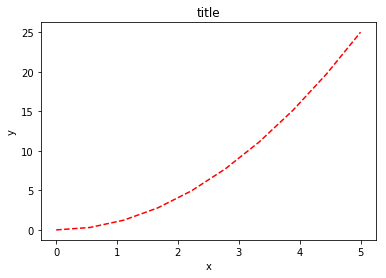

In [9]:
plt.figure()
plt.plot(x, y, 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

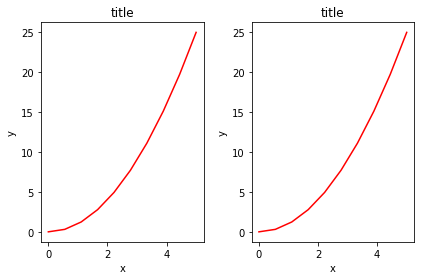

In [12]:
figs, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
figs.tight_layout()

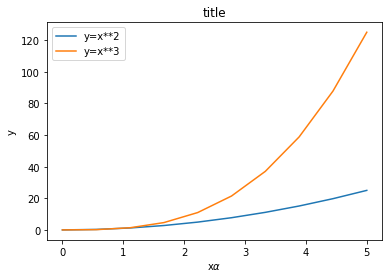

In [17]:
figs, axes = plt.subplots()
axes.plot(x, x**2, label = "y=x**2")
axes.plot(x, x**3, label = "y=x**3")
axes.legend(loc=2);
axes.set_xlabel(r'x$\alpha$')
axes.set_ylabel('y')
axes.set_title('title');

setup global fonts

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

In [26]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

more details in https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb